In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Define paths
base_dir = '/content/drive/MyDrive/Machine_Learning_Final_Project/Splitted_Data'  # Change this to a directory within your Google Drive
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

# List of classes
classes = ['Healthy', 'Brain_Tumor']

# Function to count images
def count_images(directory, classes):
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
        else:
            counts[class_name] = 0
    return counts

# Count the number of images in the training, validation, and unseen sets
train_counts = count_images(train_dir, classes)
validation_counts = count_images(validation_dir, classes)
test_counts = count_images(test_dir, classes)

print("Training set counts:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation set counts:")
for class_name, count in validation_counts.items():
    print(f"{class_name}: {count} images")

print("\nUnseen set counts:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training set counts:
Healthy: 1669 images
Brain_Tumor: 2010 images

Validation set counts:
Healthy: 208 images
Brain_Tumor: 251 images

Unseen set counts:
Healthy: 210 images
Brain_Tumor: 252 images


In [ ]:
# Epoch = 25

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define the custom CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (150, 150, 3)
num_classes = train_generator.num_classes
cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_25 = cnn_model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = cnn_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/25
115/115 [==============================] - 782s 7s/step - loss: 0.7179 - accuracy: 0.5686 - val_loss: 0.6610 - val_accuracy: 0.5861
Epoch 2/25
115/115 [==============================] - 245s 2s/step - loss: 0.6396 - accuracy: 0.6401 - val_loss: 0.5776 - val_accuracy: 0.7233
Epoch 3/25
115/115 [==============================] - 256s 2s/step - loss: 0.5908 - accuracy: 0.6787 - val_loss: 0.5568 - val_accuracy: 0.7495
Epoch 4/25
115/115 [==============================] - 252s 2s/step - loss: 0.5443 - accuracy: 0.7181 - val_loss: 0.5389 - val_accuracy: 0.7691
Epoch 5/25
115/115 [==============================] - 258s 2s/step - loss: 0.5221 - accuracy: 0.7377 - val_loss: 0.5350 - val_accuracy: 0.7320
Epoch 6/25
115/115 [==============================] - 255s 2s/step - loss: 0.5062 - accuracy: 0.7483 - val_loss: 0.5473 - val_accuracy: 0.7386
Epoch 7/25
115/115

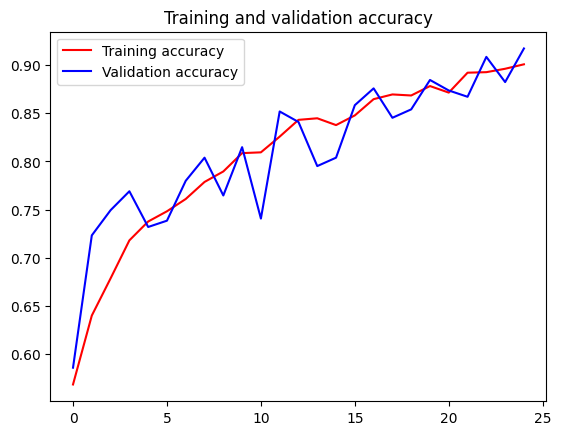

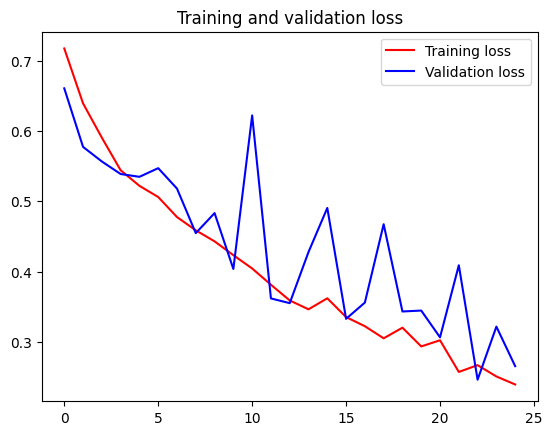

14/14 [==============================] - 13s 866ms/step - loss: 0.2616 - accuracy: 0.9174
Final validation accuracy: 0.9174
Final validation loss: 0.2616


In [ ]:
# Evaluate the model
acc = hist_25.history['accuracy']
val_acc = hist_25.history['val_accuracy']
loss = hist_25.history['loss']
val_loss = hist_25.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = cnn_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [ ]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = cnn_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 129s 10s/step - loss: 0.2289 - accuracy: 0.9107
Final test accuracy: 0.9107
Final test loss: 0.2289


15/15 [==============================] - 9s 593ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.92      0.91      0.91       252
     Healthy       0.89      0.90      0.90       210

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462

Confusion Matrix
[[229  23]
 [ 21 189]]


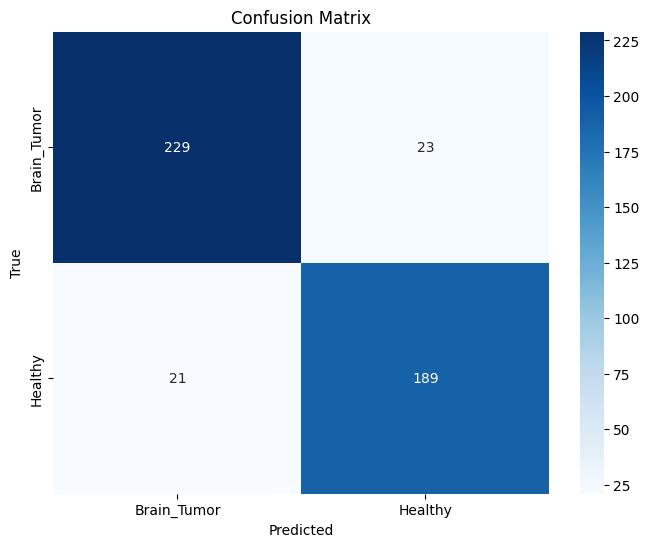

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = cnn_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/cnn_model_ML_25.h5'
cnn_model.save(drive_model_path)

In [ ]:
# Epoch 50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# Define the custom CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (150, 150, 3)
num_classes = train_generator.num_classes
cnn_model_50 = create_cnn_model(input_shape, num_classes)
# Compile the model
cnn_model_50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_50 = cnn_model_50.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = cnn_model_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/50
115/115 [==============================] - 1574s 14s/step - loss: 0.6590 - accuracy: 0.5939 - val_loss: 0.5746 - val_accuracy: 0.7168
Epoch 2/50
115/115 [==============================] - 258s 2s/step - loss: 0.5991 - accuracy: 0.6744 - val_loss: 0.5453 - val_accuracy: 0.7669
Epoch 3/50
115/115 [==============================] - 256s 2s/step - loss: 0.5705 - accuracy: 0.7089 - val_loss: 0.5110 - val_accuracy: 0.7669
Epoch 4/50
115/115 [==============================] - 256s 2s/step - loss: 0.5480 - accuracy: 0.7268 - val_loss: 0.5752 - val_accuracy: 0.7168
Epoch 5/50
115/115 [==============================] - 257s 2s/step - loss: 0.5274 - accuracy: 0.7377 - val_loss: 0.4482 - val_accuracy: 0.7821
Epoch 6/50
115/115 [==============================] - 256s 2s/step - loss: 0.4930 - accuracy: 0.7646 - val_loss: 0.4146 - val_accuracy: 0.7887
Epoch 7/50
115/1

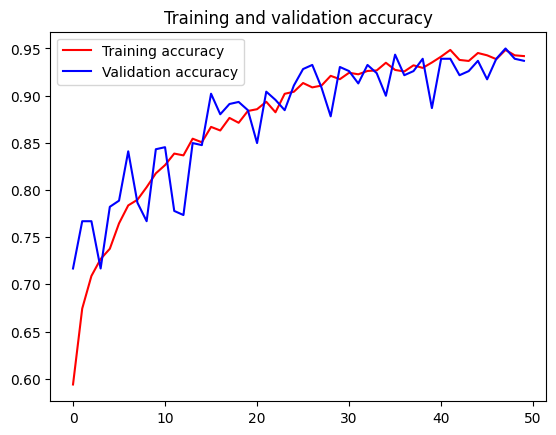

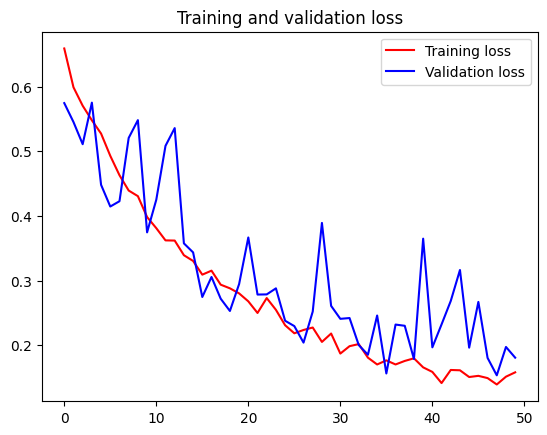

14/14 [==============================] - 12s 838ms/step - loss: 0.1851 - accuracy: 0.9353
Final validation accuracy: 0.9353
Final validation loss: 0.1851


In [ ]:
# Evaluate the model
acc = hist_50.history['accuracy']
val_acc = hist_50.history['val_accuracy']
loss = hist_50.history['loss']
val_loss = hist_50.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = cnn_model_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [ ]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = cnn_model_50.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 258s 20s/step - loss: 0.1420 - accuracy: 0.9643
Final test accuracy: 0.9643
Final test loss: 0.1420


15/15 [==============================] - 9s 520ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.96      0.96      0.96       252
     Healthy       0.95      0.95      0.95       210

    accuracy                           0.96       462
   macro avg       0.96      0.96      0.96       462
weighted avg       0.96      0.96      0.96       462

Confusion Matrix
[[242  10]
 [ 10 200]]


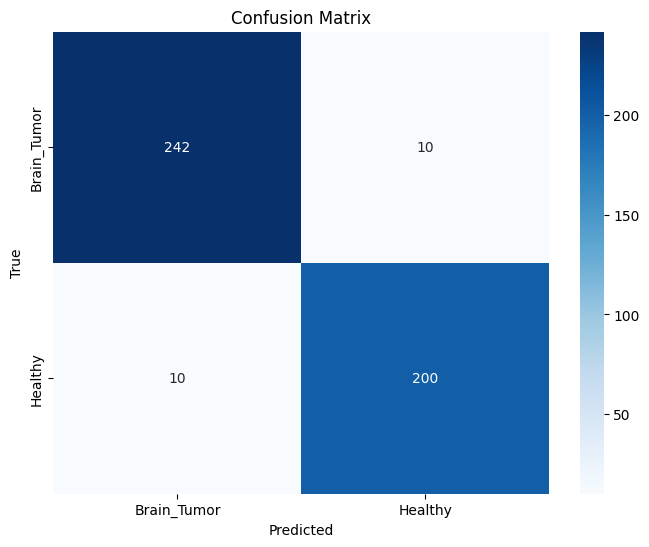

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = cnn_model_50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm_50 = confusion_matrix(test_generator.classes, y_pred)
print(cm_50)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_50, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/cnn_model_ML_50.h5'
cnn_model_50.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Epoch 50 with lr = 0.0001

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# Define the custom CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (150, 150, 3)
num_classes = train_generator.num_classes
cnn_model_50_lr = create_cnn_model(input_shape, num_classes)
# Compile the model
cnn_model_50_lr.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_50_lr = cnn_model_50_lr.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = cnn_model_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/50
115/115 [==============================] - 852s 7s/step - loss: 0.6713 - accuracy: 0.5784 - val_loss: 0.6249 - val_accuracy: 0.6383
Epoch 2/50
115/115 [==============================] - 44s 385ms/step - loss: 0.6225 - accuracy: 0.6545 - val_loss: 0.5669 - val_accuracy: 0.7255
Epoch 3/50
115/115 [==============================] - 44s 384ms/step - loss: 0.5937 - accuracy: 0.6812 - val_loss: 0.5628 - val_accuracy: 0.7429
Epoch 4/50
115/115 [==============================] - 44s 381ms/step - loss: 0.5684 - accuracy: 0.7029 - val_loss: 0.5166 - val_accuracy: 0.7669
Epoch 5/50
115/115 [==============================] - 44s 381ms/step - loss: 0.5545 - accuracy: 0.7217 - val_loss: 0.5049 - val_accuracy: 0.7560
Epoch 6/50
115/115 [==============================] - 45s 395ms/step - loss: 0.5338 - accuracy: 0.7355 - val_loss: 0.5049 - val_accuracy: 0.7843
Epoch 7/

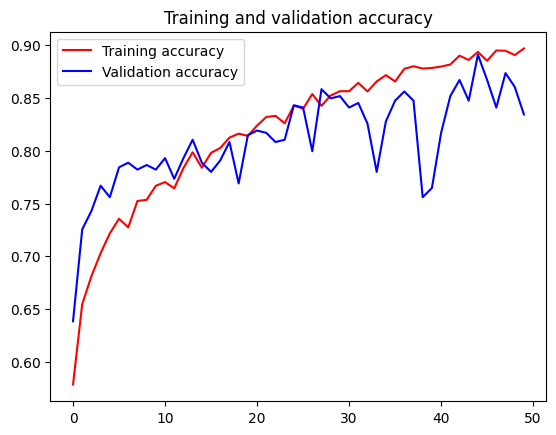

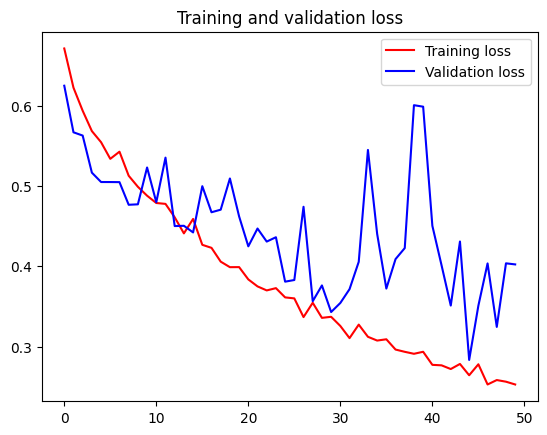

14/14 [==============================] - 3s 193ms/step - loss: 0.4046 - accuracy: 0.8371
Final validation accuracy: 0.8371
Final validation loss: 0.4046


In [ ]:
# Evaluate the model
acc = hist_50_lr.history['accuracy']
val_acc = hist_50_lr.history['val_accuracy']
loss = hist_50_lr.history['loss']
val_loss = hist_50_lr.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = cnn_model_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [ ]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = cnn_model_50_lr.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 152s 12s/step - loss: 0.3031 - accuracy: 0.8839
Final test accuracy: 0.8839
Final test loss: 0.3031


15/15 [==============================] - 5s 322ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.83      0.96      0.89       252
     Healthy       0.94      0.77      0.84       210

    accuracy                           0.87       462
   macro avg       0.88      0.86      0.87       462
weighted avg       0.88      0.87      0.87       462

Confusion Matrix
[[241  11]
 [ 49 161]]


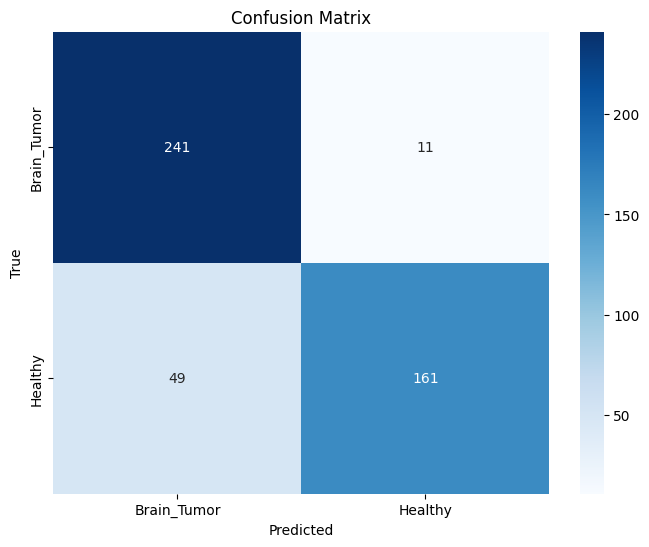

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = cnn_model_50_lr.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm_lr = confusion_matrix(test_generator.classes, y_pred)
print(cm_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/cnn_model_ML_50_lr.h5'
cnn_model_50_lr.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4 convolutional layers

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

def create_cnn_model_4(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Fourth Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


input_shape = (150, 150, 3)
num_classes = train_generator.num_classes
cnn_model_4 = create_cnn_model_4(input_shape, num_classes)

# Compile the model
cnn_model_4.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_25 = cnn_model_4.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = cnn_model_4.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/25
115/115 [==============================] - 706s 6s/step - loss: 0.6707 - accuracy: 0.5844 - val_loss: 0.6232 - val_accuracy: 0.6449
Epoch 2/25
115/115 [==============================] - 39s 340ms/step - loss: 0.6274 - accuracy: 0.6529 - val_loss: 0.5651 - val_accuracy: 0.7124
Epoch 3/25
115/115 [==============================] - 39s 341ms/step - loss: 0.5755 - accuracy: 0.7021 - val_loss: 0.4813 - val_accuracy: 0.7756
Epoch 4/25
115/115 [==============================] - 38s 332ms/step - loss: 0.5368 - accuracy: 0.7279 - val_loss: 0.4972 - val_accuracy: 0.7734
Epoch 5/25
115/115 [==============================] - 38s 331ms/step - loss: 0.5317 - accuracy: 0.7347 - val_loss: 0.4102 - val_accuracy: 0.8214
Epoch 6/25
115/115 [==============================] - 37s 325ms/step - loss: 0.4634 - accuracy: 0.7831 - val_loss: 0.4169 - val_accuracy: 0.8257
Epoch 7/

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

def create_cnn_model_4(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Fourth Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


input_shape = (150, 150, 3)
num_classes = train_generator.num_classes
cnn_model_4 = create_cnn_model_4(input_shape, num_classes)

# Compile the model
cnn_model_4.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist4_50 = cnn_model_4.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = cnn_model_4.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/50
115/115 [==============================] - 54s 341ms/step - loss: 0.6854 - accuracy: 0.5580 - val_loss: 0.5989 - val_accuracy: 0.6732
Epoch 2/50
115/115 [==============================] - 40s 349ms/step - loss: 0.6163 - accuracy: 0.6659 - val_loss: 0.4979 - val_accuracy: 0.7516
Epoch 3/50
115/115 [==============================] - 39s 343ms/step - loss: 0.5743 - accuracy: 0.7051 - val_loss: 0.5210 - val_accuracy: 0.7407
Epoch 4/50
115/115 [==============================] - 38s 334ms/step - loss: 0.5415 - accuracy: 0.7306 - val_loss: 0.4795 - val_accuracy: 0.7800
Epoch 5/50
115/115 [==============================] - 40s 347ms/step - loss: 0.5145 - accuracy: 0.7491 - val_loss: 0.4961 - val_accuracy: 0.7538
Epoch 6/50
115/115 [==============================] - 38s 330ms/step - loss: 0.4919 - accuracy: 0.7630 - val_loss: 0.5326 - val_accuracy: 0.7734
Epoch 

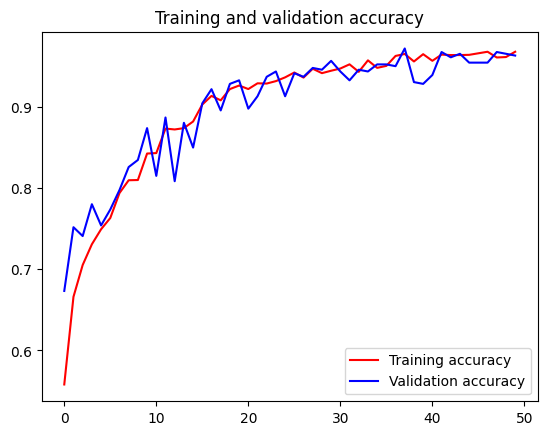

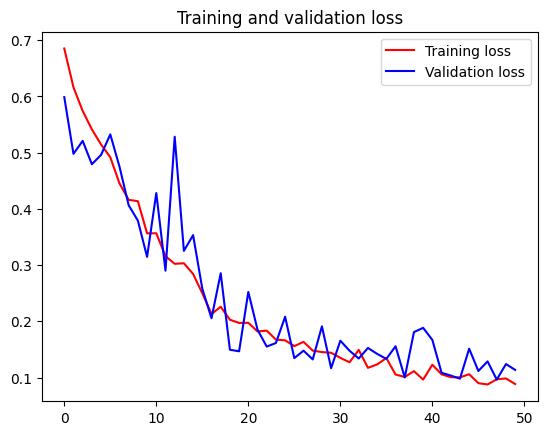

14/14 [==============================] - 2s 156ms/step - loss: 0.1161 - accuracy: 0.9621
Final validation accuracy: 0.9621
Final validation loss: 0.1161


In [6]:
# Evaluate the model
acc = hist4_50.history['accuracy']
val_acc = hist4_50.history['val_accuracy']
loss = hist4_50.history['loss']
val_loss = hist4_50.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = cnn_model_4.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [7]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = cnn_model_4.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 128s 10s/step - loss: 0.0724 - accuracy: 0.9777
Final test accuracy: 0.9777
Final test loss: 0.0724


15/15 [==============================] - 2s 152ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.98      0.98      0.98       252
     Healthy       0.98      0.97      0.97       210

    accuracy                           0.98       462
   macro avg       0.98      0.98      0.98       462
weighted avg       0.98      0.98      0.98       462

Confusion Matrix
[[247   5]
 [  6 204]]


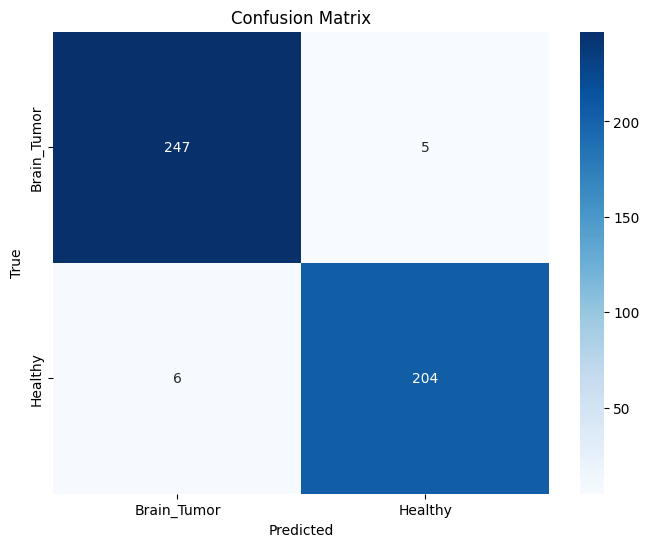

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = cnn_model_4.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm_layer4 = confusion_matrix(test_generator.classes, y_pred)
print(cm_layer4)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_layer4, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/cnn_model_ML_50_layer4.h5'
cnn_model_4.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
